# 객체 탐지 (Object Detection)

- 한 이미지에서 객체와 그 경계 상자(bounding box)를 탐지
- 객체 탐지 알고리즘은 일반적으로 이미지를 입력으로 받고, 경계 상자와 객체 클래스 리스트를 출력
- 경계 상자에 대해 그에 대응하는 예측 클래스와 클래스의 신뢰도(confidence)를 출력

## Applications

- 자율 주행 자동차에서 다른 자동차와 보행자를 찾을 때
- 의료 분야에서 방사선 사진을 사용해 종양이나 위험한 조직을 찾을 때
- 제조업에서 조립 로봇이 제품을 조립하거나 수리할 때
- 보안 산업에서 위협을 탐지하거나 사람 수를 셀 때

## Bounding Box

- 이미지에서 하나의 객체 전체를 포함하는 가장 작은 직사각형

  <img src="https://miro.medium.com/max/850/1*KL6r494Eyfh3iYEXQA2tzg.png">

## IOU(Intersection Over Union)

- 실측값(Ground Truth)과 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width="300">

- IOU가 높을수록 잘 예측한 모델

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_examples.png" width="400">

<br>

- 예시

  <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_stop_sign.jpg">

## NMS(Non-Maximum Suppression, 비최댓값 억제)

- 확률이 가장 높은 상자와 겹치는 상자들을 제거하는 과정
- 최댓값을 갖지 않는 상자들을 제거
- 과정
  1. 확률 기준으로 모든 상자를 정렬하고 먼저 가장 확률이 높은 상자를 취함
  2. 각 상자에 대해 다른 모든 상자와의 IOU를 계산
  3. 특정 임곗값을 넘는 상자는 제거

  <img src="https://pyimagesearch.com/wp-content/uploads/2014/10/nms_fast_03.jpg">

## 모델 성능 평가

### 정밀도(Precision)와 재현율(Recall)

- 일반적으로 객체 탐지 모델 평가에 사용되지는 않지만, 다른 지표를 계산하는 기본 지표 역할을 함

  - True Positives(`TP`): 예측이 동일 클래스의 실제 상자와 일치하는지 측정
  - False Positives(`FP`): 예측이 실제 상자와 일치하지 않는지 측정
  - False Negatives(`FN`): 실제 분류값이 그와 일치하는 예측을 갖지 못하는지 측정

  $\qquad precision = \frac{TP}{TP \ + \ FP}$
  $\qquad recall = \frac{TP}{TP \ + \ FN}$

  - 모델이 안정적이지 않은 특징을 기반으로 객체 존재를 예측하면 거짓긍정(FP)이 많아져서 정밀도가 낮아짐
  - 모델이 너무 엄격해서 정확한 조건을 만족할 때만 객체가 탐지된 것으로 간주하면 거짓부정(FN)이 많아져서 재현율이 낮아짐



### 정밀도-재현율 곡선(Precision-Recall Curve) 

- 신뢰도 임계값마다 모델의 정밀도와 재현율을 시각화
- 모든 bounding box와 함께 모델이 예측의 정확성을 얼마나 확실하는지 0 ~ 1사이의 숫자로 나타내는 신뢰도를 출력
- 임계값 T에 따라 정밀도와 재현율이 달라짐
  - 임계값 T 이하의 예측은 제거함
  - T가 1에 가까우면 정밀도는 높지만 재현율은 낮음  
  - 놓치는 객체가 많아져서 재현율이 낮아짐. 즉, 신뢰도가 높은 예측만 유지하기때문에 정밀도는 높아짐
  - T가 0에 가까우면 정밀도는 낮지만 재현율은 높음  
  - 대부분의 예측을 유지하기때문에 재현율은 높아지고, 거짓긍정(FP)이 많아져서 정밀도가 낮아짐
- 예를 들어, 모델이 보행자를 탐지하고 있으면 특별한 이유없이 차를 세우더라도 어떤 보행자도 놓치지 않도록 재현율을 높여야 함
- 모델이 투자 기회를 탐지하고 있다면 일부 기회를 놓치게 되더라도 잘못된 기회에 돈을 거는 일을 피하기 위해 정밀도를 높여야 함

<img src="https://www.researchgate.net/profile/Davide_Chicco/publication/321672019/figure/fig1/AS:614279602511886@1523467078452/a-Example-of-Precision-Recall-curve-with-the-precision-score-on-the-y-axis-and-the.png">

### AP (Average Precision, 평균 정밀도) 와 mAP(mean Average Precision)

- 곡선의 아래 영역에 해당
- 항상 1x1 정사각형으로 구성되어 있음  
  즉, 항상 0 ~ 1 사이의 값을 가짐
- 단일 클래스에 대한 모델 성능 정보를 제공
- 전역 점수를 얻기위해서 mAP를 사용
- 예를 들어, 데이터셋이 10개의 클래스로 구성된다면 각 클래스에 대한 AP를 계산하고, 그 숫자들의 평균을 다시 구함

- mAP 사용
  - 최소 2개 이상의 객체를 탐지하는 대회인 PASCAL Visual Object Classes와 Common Objects in Context(COCO)에서 mAP가 사용됨
  - COCO 데이터셋이 더 많은 클래스를 포함하고 있기 때문에 보통 Pascal VOC보다 점수가 더 낮게 나옴

    <img src="https://www.researchgate.net/profile/Bong_Nam_Kang/publication/328939155/figure/tbl2/AS:692891936649218@1542209719916/Evaluation-on-PASCAL-VOC-2007-and-MS-COCO-test-dev.png">


## 데이터셋(Dataset)

### VOC Dataset

- 2005년부터 2012년까지 진행
- Object Detection 기술의 benchmark로 간주
- 데이터셋에는 20개의 클래스가 존재

      background
      aeroplane
      bicycle
      bird
      boat
      bottle
      bus
      car
      cat
      chair
      cow
      diningtable
      dog
      horse
      motorbike
      person
      pottedplant
      sheep
      sofa
      train
      tvmonitor

- 훈련 및 검증 데이터 : 11,530개
- ROI에 대한 27,450개의 Annotation이 존재
- 이미지당 2.4개의 객체 존재

  <img src="https://paperswithcode.github.io/sotabench-eval/img/pascalvoc2012.png">

### COCO Dataset

- Common Objects in Context
- 200,000개의 이미지 
- 80개의 카테고리에 500,000개 이상의 객체 Annotation이 존재
      person
      bicycle
      car
      motorbike
      aeroplane
      bus
      train
      truck
      boat
      traffic light
      fire hydrant
      stop sign
      parking meter
      bench
      bird
      cat
      dog
      horse
      sheep
      cow
      elephant
      bear
      zebra
      giraffe
      backpack
      umbrella
      handbag
      tie
      suitcase
      frisbee
      skis
      snowboard
      sports ball
      kite
      baseball bat
      baseball glove
      skateboard
      surfboard
      tennis racket
      bottle
      wine glass
      cup
      fork
      knife
      spoon
      bowl
      banana
      apple
      sandwich
      orange
      broccoli
      carrot
      hot dog
      pizza
      donut
      cake
      chair
      sofa
      pottedplant
      bed
      diningtable
      toilet
      tvmonitor
      laptop
      mouse
      remote
      keyboard
      cell phone
      microwave
      oven
      toaster
      sink
      refrigerator
      book
      clock
      vase
      scissors
      teddy bear
      hair drier
      toothbrush
      
- https://cocodataset.org/

<img src="https://cocodataset.org/images/coco-examples.jpg">



# 객체 탐지 (Object Detection)의 역사

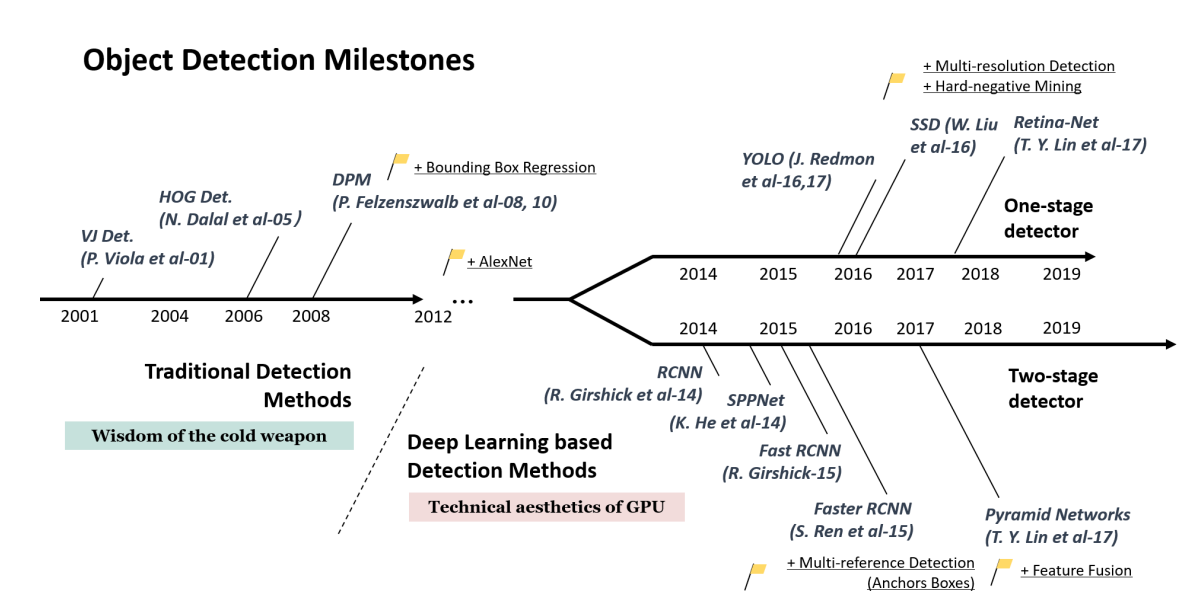


* RCNN (2013)
  - Rich feature hierarchies for accurate object detection and semantic segmentation (https://arxiv.org/abs/1311.2524)
  - 물체 검출에 사용된 기존 방식인 sliding window는 background를 검출하는 소요되는 시간이 많았는데, 이를 개선시킨 기법으로 Region Proposal 방식 제안
  - 매우 높은 Detection이 가능하지만, 복잡한 아키텍처 및 학습 프로세스로 인해 Detection 시간이 매우 오래 걸림

* SPP Net (2014)
  - Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition (https://arxiv.org/abs/1406.4729)
  - RCNN의 문제를 Selective search로 해결하려 했지만, bounding box의 크기가 제각각인 문제가 있어서 FC Input에 고정된 사이즈로 제공하기 위한 방법 제안
  - SPP은 RCNN에서 conv layer와 fc layer사이에 위치하여 서로 다른 feature map에 투영된 이미지를 고정된 값으로 풀링
  - SPP를 이용해 RCNN에 비해 실행시간을 매우 단축시킴

* Fast RCNN (2015)
  - Fast R-CNN (https://arxiv.org/abs/1504.08083)
  - SPP layer를 ROI pooling으로 바꿔서 7x7 layer 1개로 해결
  - SVM을 softmax로 대체하여 Classification 과 Regression Loss를 함께 반영한 Multi task Loss 사용
  - ROI Pooling을 이용해 SPP보다 간단하고, RCNN에 비해 수행시간을 많이 줄임

* Fater RCNN(2015)
  - Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks (https://arxiv.org/abs/1506.01497)
  - RPN(Region proposal network) + Fast RCNN 방식
  - Selective Search를 대체하기 위한 Region Proposal Network구현
  - RPN도 학습시켜서 전체를 end-to-end로 학습 가능 (GPU사용 가능)
  - Region Proposal를 위해 Object가 있는지 없는지의 후보 Box인 Anchor Box 개념 사용
  - Anchor Box를 도입해 FastRCNN에 비해 정확도를 높이고 속도를 향상시킴

* SSD (2015)
  - SSD: Single Shot MultiBox Detector (https://arxiv.org/abs/1512.02325)
  - Faster-RCNN은 region proposal과 anchor box를 이용한 검출의 2단계를 걸치는 과정에서 시간이 필요해 real-time(20~30 fps)으로는 어려움
  - SSD는 Feature map의 size를 조정하고, 동시에 앵커박스를 같이 적용함으로써 1 shot으로 물체 검출이 가능
  - real-time으로 사용할 정도의 성능을 갖춤 (30~40 fps)
  - 작은 이미지의 경우에 잘 인식하지 못하는 경우가 생겨서 data augmentation을 통해 mAP를 63에서 74로 비약적으로 높임

* RetinaNet (2017)
  - Focal Loss for Dense Object Detection (https://arxiv.org/abs/1708.02002)
  - RetinaNet이전에는 1-shot detection과 2-shot detection의 차이가 극명하게 나뉘어 속도를 선택하면 정확도를 trade-off 할 수 밖에 없는 상황
  - RetinaNet은 Focal Loss라는 개념의 도입과 FPN 덕분에 기존 모델들보다 정확도도 높고 속도도 여타 1-shot detector와 비견되는 모델
  - Detection에선 검출하고 싶은 물체와 (foreground object) 검출할 필요가 없는 배경 물체들이 있는데 (background object) 배경 물체의 숫자가 매우 많을 경우 배경 Loss를 적게 하더라도 숫자에 압도되어 배경의 Loss의 총합을 학습해버림 (예를 들어, 숲을 배경으로 하는 사람을 검출해야하는데 배경의 나무가 100개나 되다보니 사람의 특징이 아닌 나무가 있는 배경을 학습해버림)
  - Focal Loss는 이런 문제를 기존의 crossentropy 함수에서 (1-sig)을 제곱하여 background object의 loss를 현저히 줄여버리는 방법으로 loss를 변동시켜 해결
  - Focal Loss를 통해 검출하고자 하는 물체와 관련이 없는 background object들은 학습에 영향을 주지 않게 되고, 학습의 다양성이 더 넓어짐 (작은 물체, 큰 물체에 구애받지 않고 검출할 수 있게됨)
  - 실제로 RetinaNet은 object proposal을 2000개나 실시하여 이를 확인

* Mask R-CNN (2018)
  - Mask R-CNN (https://arxiv.org/pdf/1703.06870.pdf)

* YOLO (2018)
  - YOLOv3: An Incremental Improvement (https://arxiv.org/abs/1804.02767)
  - YOLO는 v1, v2, v3의 순서로 발전하였는데, v1은 정확도가 너무 낮은 문제가 있었고 이 문제는 v2까지 이어짐
  - 엔지니어링적으로 보완한 v3는 v2보다 살짝 속도는 떨어지더라도 정확도를 대폭 높인 모델
  - RetinaNet과 마찬가지로 FPN을 도입해 정확도를 높임
  - RetinaNet에 비하면 정확도는 4mAP정도 떨어지지만, 속도는 더 빠르다는 장점

* RefineDet (2018)
  - Single-Shot Refinement Neural Network for Object Detection (https://arxiv.org/pdf/1711.06897.pdf)

* M2Det (2019)
  - M2Det: A Single-Shot Object Detector based on Multi-Level Feature Pyramid Network (https://arxiv.org/pdf/1811.04533.pdf)

* EfficientDet (2019)
  - EfficientDet: Scalable and Efficient Object Detection (https://arxiv.org/pdf/1911.09070v1.pdf)

* YOLOv4 (2020)
  - YOLOv4: Optimal Speed and Accuracy of Object Detection (https://arxiv.org/pdf/2004.10934v1.pdf)
  - YOLOv3에 비해 AP, FPS가 각각 10%, 12% 증가
  - YOLOv3와 다른 개발자인 AlexeyBochkousky가 발표
  - v3에서 다양한 딥러닝 기법(WRC, CSP ...) 등을 사용해 성능을 향상시킴
  - CSPNet 기반의 backbone(CSPDarkNet53)을 설계하여 사용

* YOLOv5 (2020)
  - YOLOv4에 비해 낮은 용량과 빠른 속도 (성능은 비슷)
  - YOLOv4와 같은 CSPNet 기반의 backbone을 설계하여 사용
  - YOLOv3를 PyTorch로 implementation한 GlennJocher가 발표
  - Darknet이 아닌 PyTorch 구현이기 때문에, 이전 버전들과 다르다고 할 수 있음

* 이후
  - 수 많은 YOLO 버전들이 탄생
  - Object Detection 분야의 논문들이 계속해서 나오고 있음

# YOLO (You Only Look Once)

- 가장 빠른 객체 검출 알고리즘 중 하나
- 256x256 사이즈의 이미지
- 파이썬, 텐서플로 기반 프레임워크가 아닌 C++로 구현된 코드 기준 GPU 사용 시, 초당 170 프레임(170 FPS, frames per second)
- 작은 크기의 물체를 탐지하는데는 어려움

<img src="https://miro.medium.com/max/1400/1*bSLNlG7crv-p-m4LVYYk3Q.png" width="600">

- https://pjreddie.com/darknet/yolo/
- https://www.youtube.com/watch?v=MPU2HistivI

## YOLO 아키텍처

- 백본 모델(backbone model) 기반
- 특징 추출기(Feature Extractor)라고도 불림
- YOLO는 자체 맞춤 아키텍쳐 사용

  <img src="https://user-images.githubusercontent.com/26322627/70716343-8e857200-1d2f-11ea-8e60-9c75f24ca9ce.png">

- 어떤 특징 추출기 아키텍쳐를 사용했는지에 따라 성능 달라짐

  <img src="https://www.researchgate.net/publication/335865923/figure/fig1/AS:804106595758082@1568725360777/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three.jpg">

- 마지막 계층은 크기가 $w \times h \times D$인 특징 볼륨 출력
- $w \times h $는 그리드의 크기이고, $D$는 특징 볼륨 깊이



## YOLO 계층 출력

- 마지막 계층 출력은 $w \times h \times M$ 행렬
  - $M = B \times (C + 5)$
    - B : 그리드 셀당 경계 상자 개수
    - C : 클래스 개수
  - 클래스 개수에 5를 더한 이유는 해당 값 만큼의 숫자를 예측해야함
    - $t_x$, $t_y$는 경계상자의 중심 좌표를 계산
    - $t_w$, $t_h$는 경계상자의 너비와 높이를 계산
    - $c$는 객체가 경계 상자 안에 있다고 확신하는 신뢰도
    - $p1, p2, ..., pC$는 경계상자가 클래스 1, 2, ..., C의 객체를 포함할 확률

  <img src="https://www.researchgate.net/profile/Thi_Le3/publication/337705605/figure/fig3/AS:831927326089217@1575358339500/Structure-of-one-output-cell-in-YOLO.ppm">

- Objectness Score: 바운딩 박스에 객체가 포함되어 있을 확률

## 앵커 박스(Anchor Box)

- YOLOv2에서 도입
- 사전 정의된 상자(prior box)
- 객체에 가장 근접한 앵커 박스를 맞추고 신경망을 사용해 앵커 박스의 크기를 조정하는 과정때문에 $t_x, t_y, t_w, t_h$이 필요

  <img src="https://kr.mathworks.com/help/vision/ug/ssd_detection.png">

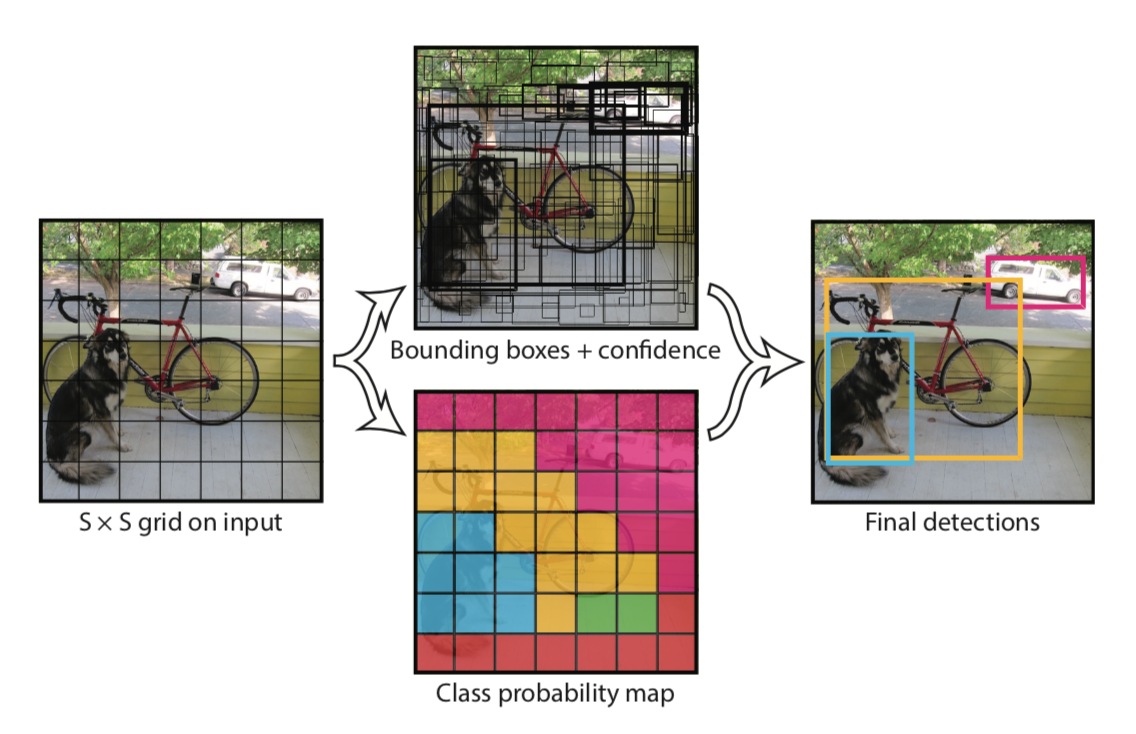

## YOLOv3 모델 (TensorFlow)

- 코드: https://github.com/zzh8829/yolov3-tf2

### 모델 다운로드

### 모델 파일 변환

DarkNet의 모델파일을 Keras에서 사용할 수 있는 모델 파일로 변환
- `convert.py`: 변환 실행 파일
- `yolov3.weight`: Darknet으로 학습된 모델 파일
- `yolov3.tf`: Keras Yolov3 모델


* Yolov3 Weight: https://pjreddie.com/media/files/yolov3.weights

### Detector

## YOLOv3 모델 (PyTorch)

* https://github.com/ultralytics/yolov3
* https://www.ultralytics.com

### 모델 다운로드

### 추론(Inference)

`detect.py`: YOLOv3 모델을 이용한 추론

## YOLOv5 모델 (PyTorch)

* https://github.com/ultralytics/yolov5
* https://www.ultralytics.com

### 모델 다운로드

In [9]:
!pip uninstall imgaug
!pip install imgaug==0.2.5

Found existing installation: imgaug 0.2.5
Uninstalling imgaug-0.2.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.5
  Using cached imgaug-0.2.5-py3-none-any.whl


In [10]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


### 추론(Inference)

`detect.py`: YOLOv5 모델을 이용한 추론

In [11]:
!ls data/images

bus.jpg  zidane.jpg


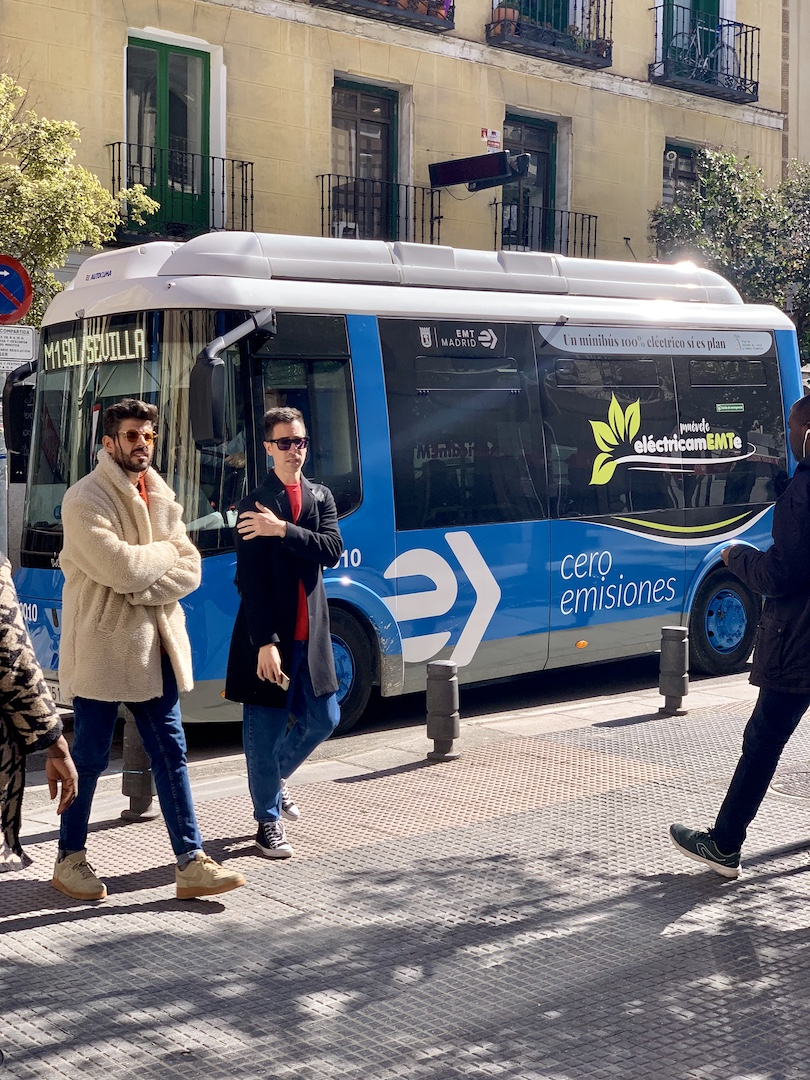

In [12]:
Image(filename='data/images/bus.jpg', width=600)

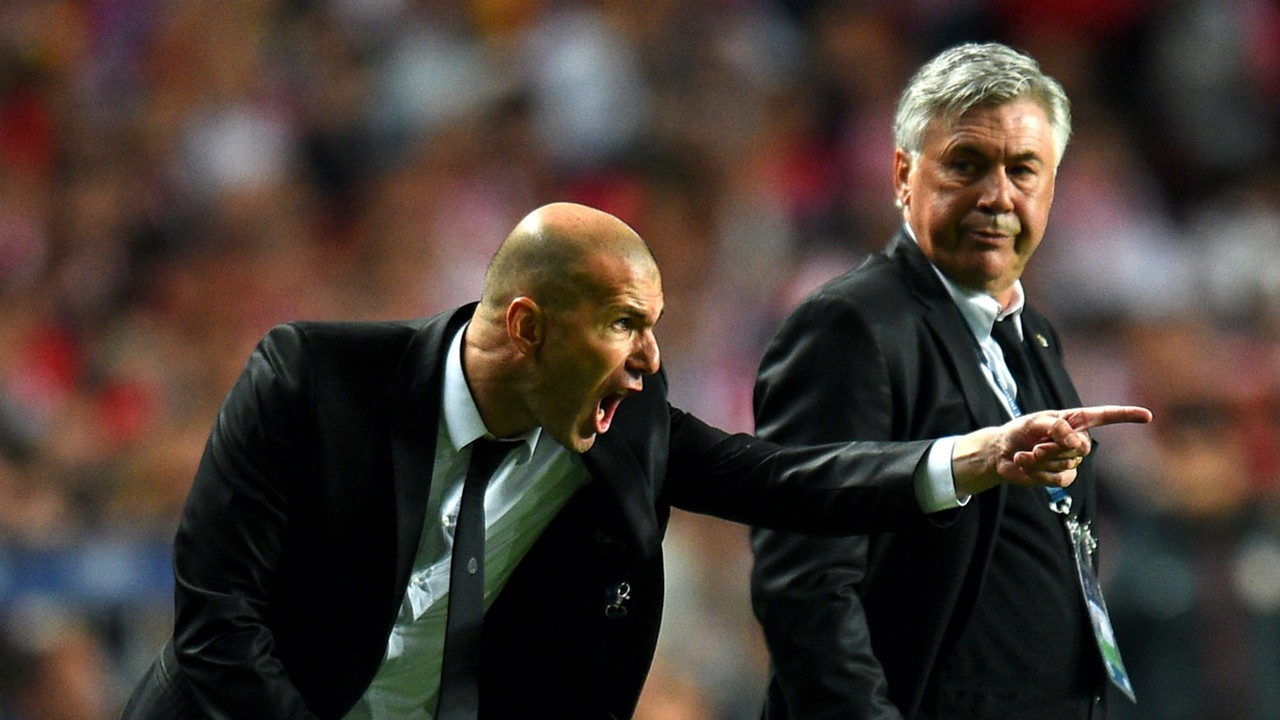

In [13]:
Image(filename='data/images/zidane.jpg', width=600)

In [14]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-169-g1994ad9 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.016s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.017s)
Speed: 0.4ms pre-process, 16.3ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


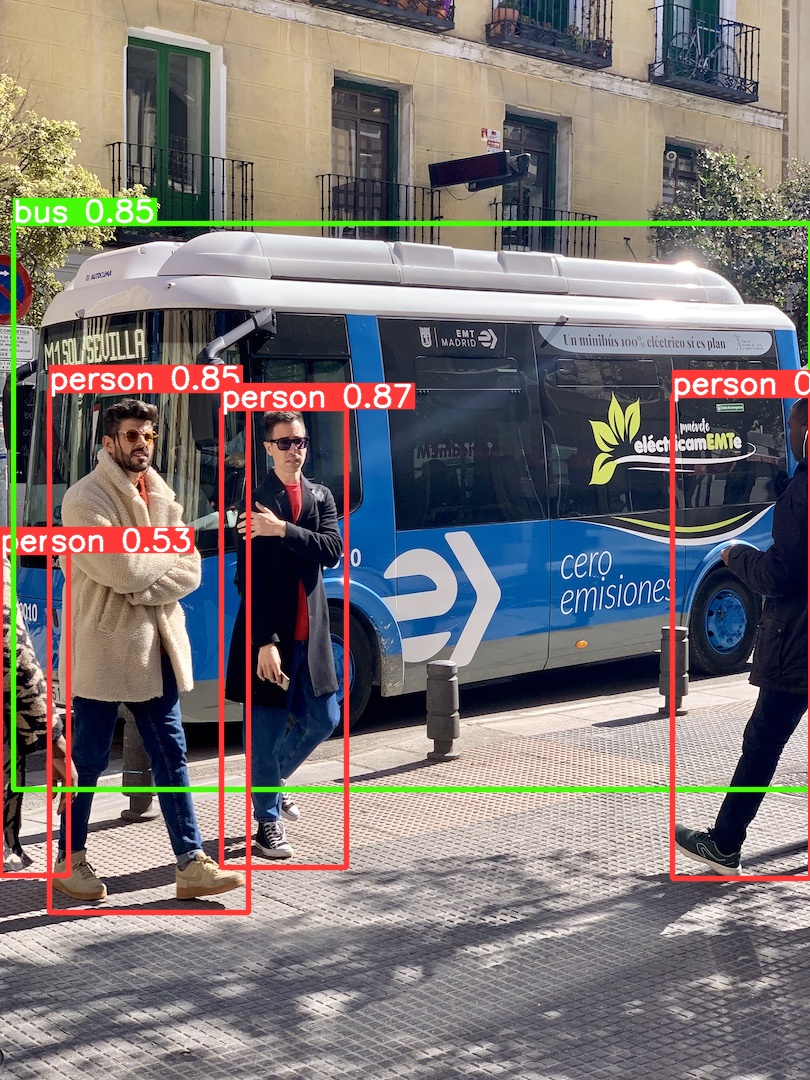

In [16]:
Image(filename='runs/detect/exp2/bus.jpg', width=600)

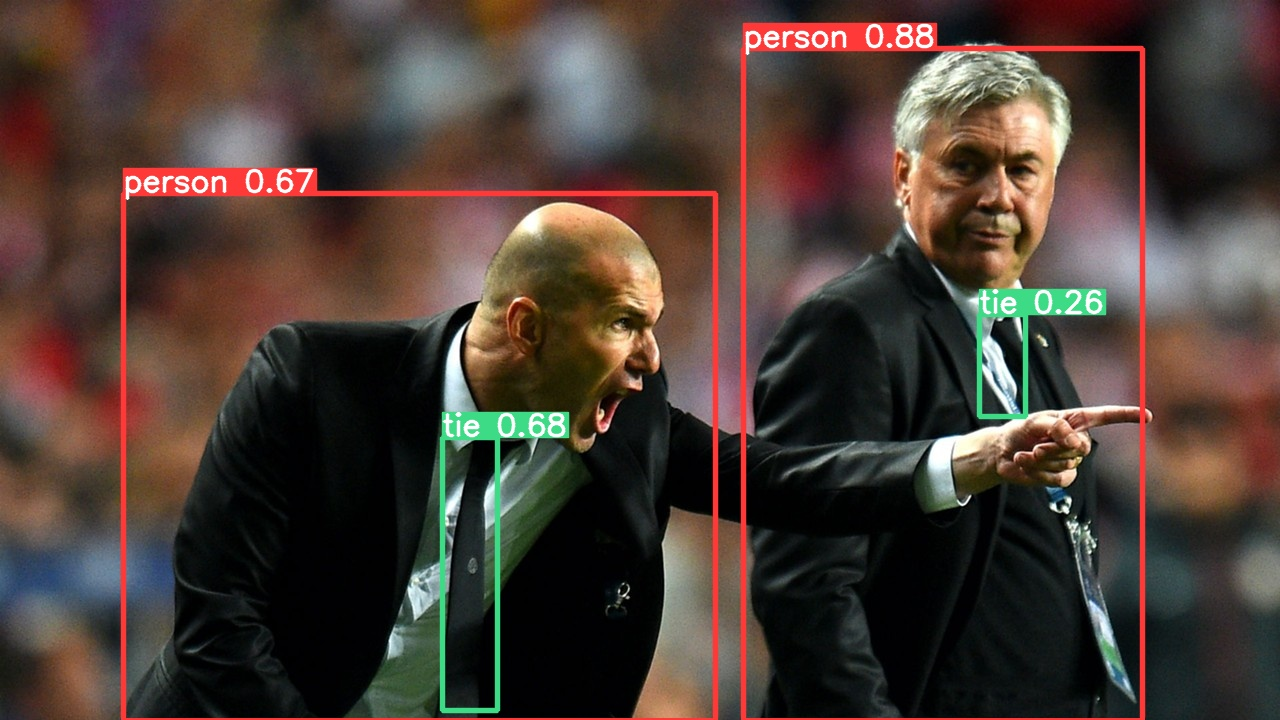

In [17]:
Image(filename='runs/detect/exp2/zidane.jpg', width=600)

## 포트홀 탐지 모델

### 데이터셋 다운로드

* 포트홀 데이터셋: https://public.roboflow.com/object-detection/pothole

In [18]:
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole
!curl -L "https://public.roboflow.com/ds/OHVXBc8EBW?key=haQGGRUdke" > roboflow.zip: unzip roboflow.zip: rm roboflow.zip

/content/yolov5/pothole
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1378      0 --:--:-- --:--:-- --:--:--  1376
100 46.0M  100 46.0M    0     0  34.7M      0  0:00:01  0:00:01 --:--:--  194M
curl: (6) Could not resolve host: unzip
curl: (6) Could not resolve host: roboflow.zip
curl: (6) Could not resolve host: rm
curl: (6) Could not resolve host: roboflow.zip


### 모델 구성

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

### 검증(Validation)

### 추론(Inference)

### 모델 내보내기

## 연기 탐지 모델

### 데이터셋 다운로드

* 연기 데이터셋: https://public.roboflow.com/object-detection/wildfire-smoke/

### 모델 구성

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

### 검증(Validation)

### 추론(Inference)

### 모델 내보내기

## 안전모 탐지 모델

### 데이터셋 다운로드

* 안전모 데이터셋: https://public.roboflow.com/object-detection/hard-hat-workers

### 모델 구성

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

### 검증(Validation)

### 추론(Inference)

### 모델 내보내기

## 주차공간 탐지 모델

### 데이터셋 다운로드

* 주차공간 데이터셋: https://public.roboflow.com/object-detection/pklot

### 모델 구성

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

### 검증(Validation)

### 추론(Inference)

### 모델 내보내기